In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
myData = datasets.load_iris()
myData_df = pd.DataFrame(myData.data, columns = myData.feature_names)
myData_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


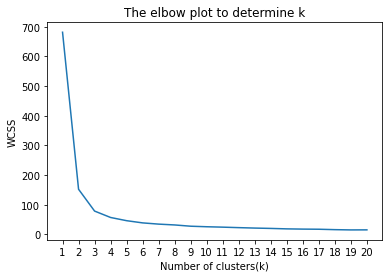

In [3]:
wcss = []

for i in range(1,21):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(myData_df)
    wcss.append(kmeans.inertia_) 
    
plt.plot(range(1,21),wcss)
plt.title("The elbow plot to determine k")
plt.xlabel("Number of clusters(k)")
plt.ylabel("WCSS")
plt.xticks(range(1,21))
plt.show()

In [4]:
kmeans = KMeans(n_clusters= 3)
kmeans_fmodel= kmeans.fit(myData_df)

In [5]:
y_kmeans = kmeans_fmodel.predict(myData_df)
myData_df['Cluster']= y_kmeans
myData_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [6]:
kmeans_fmodel.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

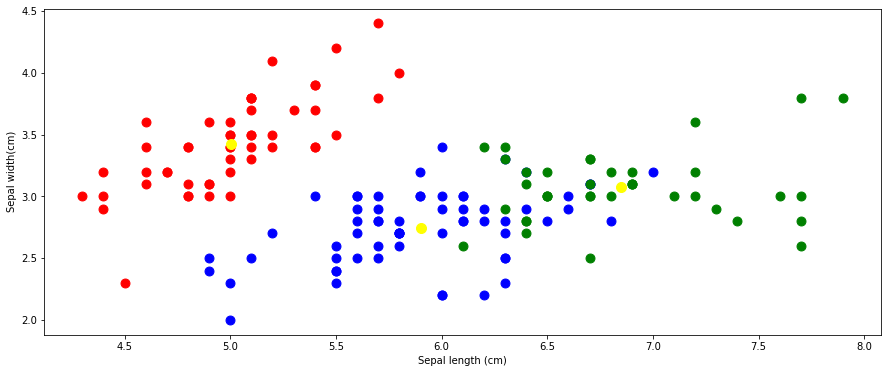

In [7]:
x = myData_df.iloc[:,[0,1,2,3]].values

plt.figure(figsize=(15,6))

plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s= 80
            , c= 'red',label= 'Cluster 0')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s= 80
            , c= 'blue',label= 'Cluster 1')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s= 80
            , c= 'green',label= 'Cluster 2')



plt.scatter(kmeans_fmodel.cluster_centers_[:,0],
           kmeans_fmodel.cluster_centers_[:,1],s= 100,
           c = 'yellow',label= 'Centroids')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width(cm)')
plt.show()